<a href="https://colab.research.google.com/github/Sibahle01/Weather-Prediction-Project-/blob/main/Weather_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

api_key = "07f6f276fcb8caf7495f096cfe7276c0"
city = "Durban"

# API URL
url = f"http://api.openweathermap.org/data/2.5/weather?q=Durban&appid=07f6f276fcb8caf7495f096cfe7276c0&units=metric"

# Send a GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    weather_data = response.json()

    # Extract the desired data
    city_name = weather_data['name']
    temp = weather_data['main']['temp']
    weather_description = weather_data['weather'][0]['description']

    # Print the weather information
    print(f"City: {city_name}")
    print(f"Temperature: {temp}°C")
    print(f"Weather: {weather_description}")
else:
    print(f"Failed to fetch weather data. Status code: {response.status_code}")



City: Durban
Temperature: 28.51°C
Weather: broken clouds


**Use the OpenWeatherMap API to gather weather data for a list of cities.**

Weather Data:
             City  Temperature (°C)  Humidity (%)          Weather
0          Durban             26.92            83    broken clouds
1       Cape Town             26.65            65        clear sky
2    Johannesburg             31.30            33       few clouds
3        Pretoria             34.76            39        clear sky
4  Port Elizabeth             26.84            62        clear sky
5        New York              7.11            94             mist
6          London              6.71            82  overcast clouds
7          Sydney             20.78            71    broken clouds
8          Mumbai             27.99            47            smoke
9           Tokyo              9.93            50        clear sky


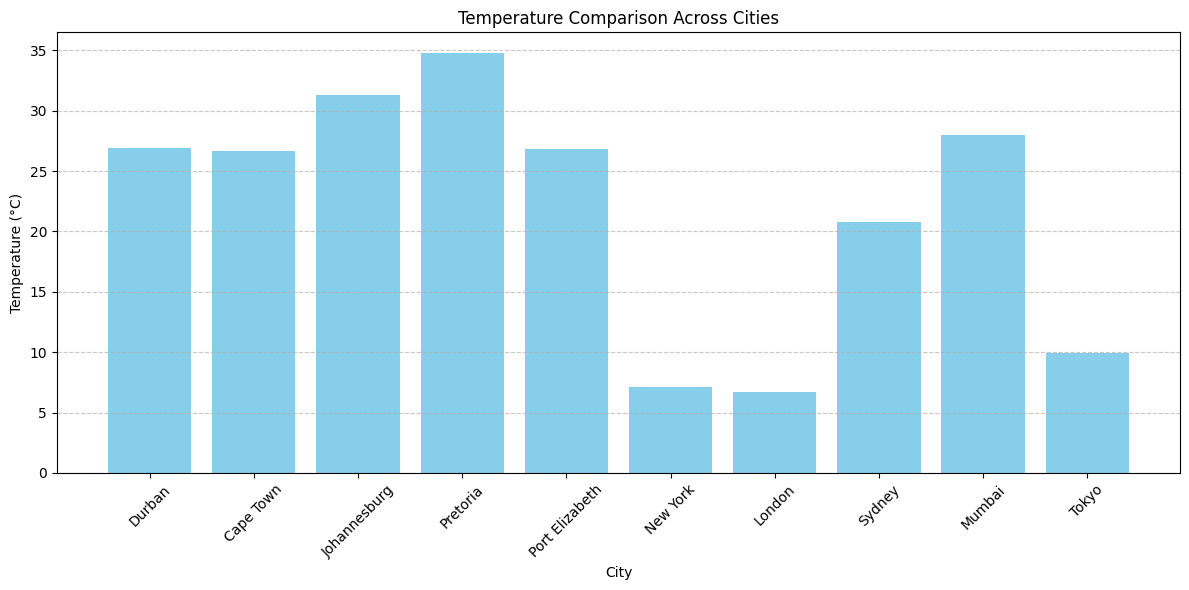

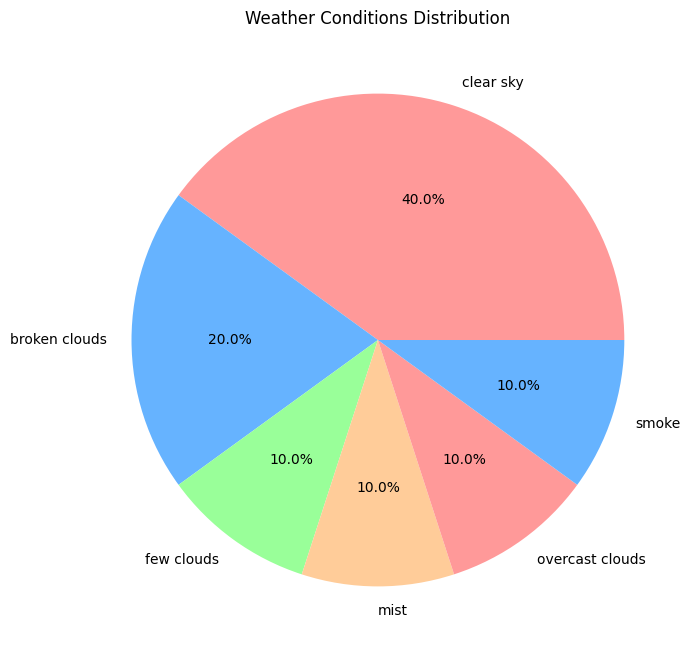

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time  # To handle delays between API calls

# API key
api_key = "07f6f276fcb8caf7495f096cfe7276c0"

# Expanded list of cities
cities = ["Durban", "Cape Town", "Johannesburg", "Pretoria", "Port Elizabeth",
          "New York", "London", "Sydney", "Mumbai", "Tokyo"]

# Initialize a list to store weather data
weather_data = []

# Fetch data for each city with rate limiting
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            weather_data.append({
                "City": data["name"],
                "Temperature (°C)": data["main"]["temp"],
                "Humidity (%)": data["main"]["humidity"],
                "Weather": data["weather"][0]["description"]
            })
        else:
            print(f"Failed to fetch data for {city}. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error fetching data for {city}: {e}")

    # Wait 1 second between requests to avoid hitting the rate limit
    time.sleep(1)

# Convert to Pandas DataFrame
df = pd.DataFrame(weather_data)

# Display the data
print("Weather Data:")
print(df)

# Save to a CSV file
df.to_csv("weather_data.csv", index=False)

# ----------- Data Analysis and Visualization -----------

# Plot Temperature Comparison
plt.figure(figsize=(12, 6))
plt.bar(df["City"], df["Temperature (°C)"], color="skyblue")
plt.title("Temperature Comparison Across Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart: Weather Conditions
weather_counts = df["Weather"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=weather_counts.index, autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
plt.title("Weather Conditions Distribution")
plt.show()


**Build a machine learning regression model to predict the temperature of a city based on historical weather data.**

In [8]:
import sklearn
print(sklearn.__version__)


1.5.2


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests

# API key
api_key = "07f6f276fcb8caf7495f096cfe7276c0"

In [11]:
import requests

api_key = "07f6f276fcb8caf7495f096cfe7276c0"
city = "Cape Town"
url = f"http://api.openweathermap.org/data/2.5/forecast?q=Cape Town&appid=07f6f276fcb8caf7495f096cfe7276c0"

response = requests.get(url)
data = response.json()

**The structure of the Dataset **

In [12]:
print(data.keys())

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])


In [13]:
first_forecast = data['list'][0]
print(first_forecast.keys())

dict_keys(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys', 'dt_txt'])


In [16]:
second_forecast = data['main'][0]
print(second_forecast.keys())

KeyError: 'main'

In [17]:
for forecast in data['list'][:5]:  # Look at the first 5 forecasts
    timestamp = forecast['dt_txt']  # Human-readable timestamp
    temperature = forecast['main']['temp']  # Temperature in Kelvin
    weather_description = forecast['weather'][0]['description']  # Weather description
    print(f"Time: {timestamp}, Temp: {temperature}K, Condition: {weather_description}")


Time: 2024-12-10 18:00:00, Temp: 297.46K, Condition: clear sky
Time: 2024-12-10 21:00:00, Temp: 295.21K, Condition: clear sky
Time: 2024-12-11 00:00:00, Temp: 292.73K, Condition: clear sky
Time: 2024-12-11 03:00:00, Temp: 292.52K, Condition: few clouds
Time: 2024-12-11 06:00:00, Temp: 294.17K, Condition: scattered clouds


Using the 'city' Key
The 'city' key provides information about the city the forecast is for. You can use it to extract details like the city name, coordinates, and country.

In [18]:
city_info = data['city']
city_name = city_info['name']
country = city_info['country']
coordinates = city_info['coord']

print(f"City: {city_name}, Country: {country}, Coordinates: {coordinates}")


City: Cape Town, Country: ZA, Coordinates: {'lat': -33.9258, 'lon': 18.4232}


**We'll loop through the 'list' key and extract timestamps, temperatures, and weather conditions.**

In [19]:
# Extract weather forecast details into a structured list
forecast_data = []

for forecast in data['list']:
    timestamp = forecast['dt_txt']  # Human-readable timestamp
    temperature = forecast['main']['temp'] - 273.15  # Convert Kelvin to Celsius
    weather_description = forecast['weather'][0]['description']  # Weather description
    wind_speed = forecast['wind']['speed']  # Wind speed
    forecast_data.append([timestamp, temperature, weather_description, wind_speed])

# Convert to a DataFrame
df = pd.DataFrame(forecast_data, columns=['Timestamp', 'Temperature (C)', 'Condition', 'Wind Speed (m/s)'])


In [22]:
print(df.head(20))

              Timestamp  Temperature (C)         Condition  Wind Speed (m/s)
0   2024-12-10 18:00:00            24.31         clear sky              4.26
1   2024-12-10 21:00:00            22.06         clear sky              3.62
2   2024-12-11 00:00:00            19.58         clear sky              3.26
3   2024-12-11 03:00:00            19.37        few clouds              3.09
4   2024-12-11 06:00:00            21.02  scattered clouds              3.63
5   2024-12-11 09:00:00            22.72  scattered clouds              5.17
6   2024-12-11 12:00:00            23.26  scattered clouds              6.22
7   2024-12-11 15:00:00            22.07         clear sky              6.72
8   2024-12-11 18:00:00            19.91  scattered clouds              6.49
9   2024-12-11 21:00:00            18.88     broken clouds              4.06
10  2024-12-12 00:00:00            18.18     broken clouds              3.22
11  2024-12-12 03:00:00            17.65  scattered clouds              1.03

Visualize the Data
Plot Temperature Over Time

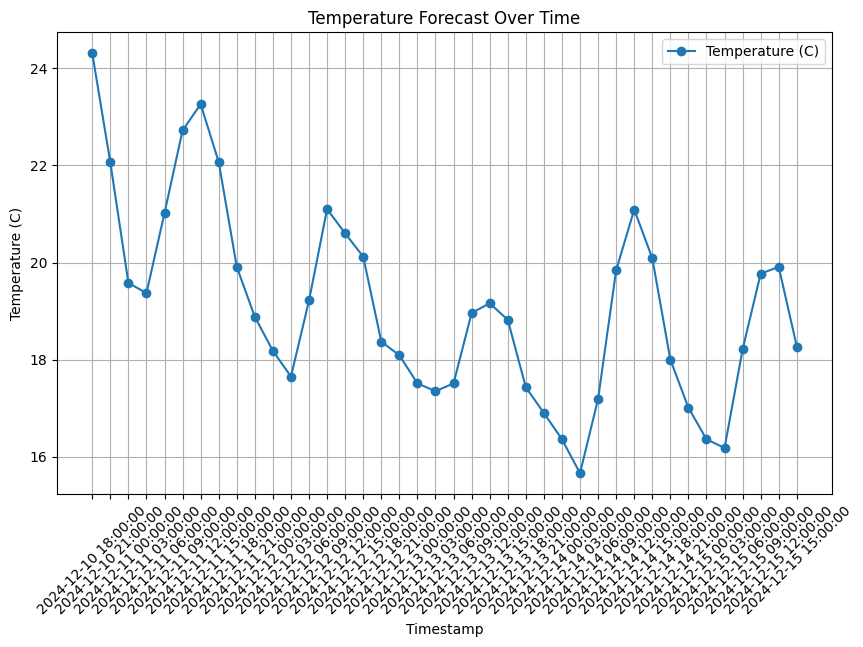

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Temperature (C)'], marker='o', label='Temperature (C)')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Temperature (C)')
plt.title('Temperature Forecast Over Time')
plt.legend()
plt.grid()
plt.show()


**Wind Speed Over Time**

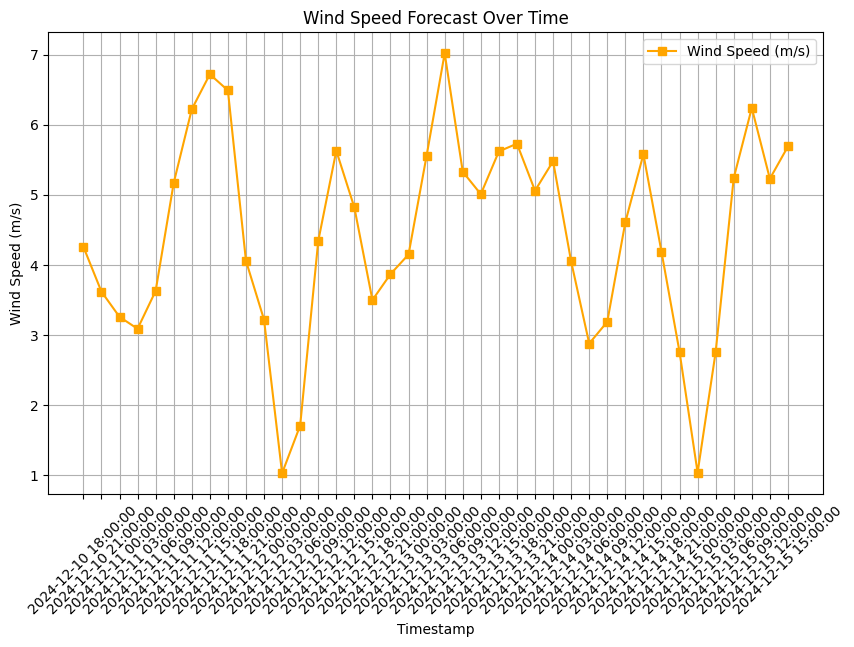

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Wind Speed (m/s)'], marker='s', color='orange', label='Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Forecast Over Time')
plt.legend()
plt.grid()
plt.show()


**Humidity over time **

In [25]:
# Extract weather forecast details into a structured list
forecast_data = []

for forecast in data['list']:
    timestamp = forecast['dt_txt']  # Human-readable timestamp
    temperature = forecast['main']['temp'] - 273.15  # Convert Kelvin to Celsius
    humidity = forecast['main']['humidity']  # Humidity percentage
    weather_description = forecast['weather'][0]['description']  # Weather description
    wind_speed = forecast['wind']['speed']  # Wind speed
    forecast_data.append([timestamp, temperature, humidity, weather_description, wind_speed])

# Convert to a DataFrame
df = pd.DataFrame(forecast_data, columns=['Timestamp', 'Temperature (C)', 'Humidity (%)', 'Condition', 'Wind Speed (m/s)'])


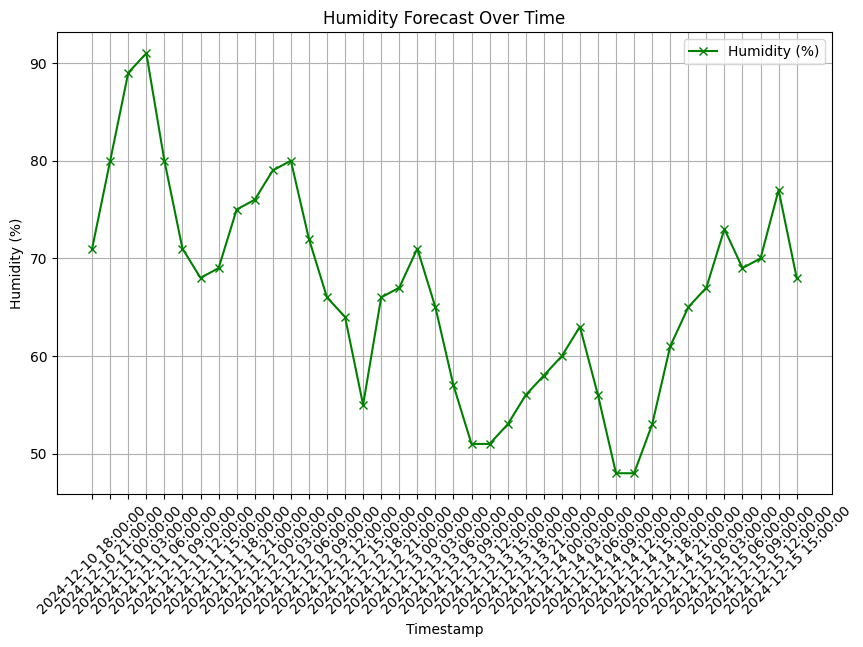

In [26]:
import matplotlib.pyplot as plt

# Plot Humidity
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Humidity (%)'], marker='x', color='green', label='Humidity (%)')
plt.xticks(rotation=45)
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Forecast Over Time')
plt.legend()
plt.grid()
plt.show()


**Add Multiple Cities**: Predicting outcomes using Machine Learning

In [31]:
cities = ["Cape Town", "Johannesburg", "Durban", "Pretoria", "Bloemfontein"]
forecast_list = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"
    response = requests.get(url)
    data = response.json()

    for forecast in data['list']:
        timestamp = forecast['dt_txt']
        temperature = forecast['main']['temp'] - 273.15
        humidity = forecast['main']['humidity']
        condition = forecast['weather'][0]['description']
        wind_speed = forecast['wind']['speed']
        forecast_list.append([city, timestamp, temperature, humidity, condition, wind_speed])

# Convert to a DataFrame
df_multi = pd.DataFrame(forecast_list, columns=['City', 'Timestamp', 'Temperature (C)', 'Humidity (%)', 'Condition', 'Wind Speed (m/s)'])
print(df_multi.head(100))


         City            Timestamp  Temperature (C)  Humidity (%)  \
0   Cape Town  2024-12-10 18:00:00            24.98            66   
1   Cape Town  2024-12-10 21:00:00            23.35            73   
2   Cape Town  2024-12-11 00:00:00            21.38            82   
3   Cape Town  2024-12-11 03:00:00            19.37            91   
4   Cape Town  2024-12-11 06:00:00            21.02            80   
..        ...                  ...              ...           ...   
95     Durban  2024-12-12 15:00:00            25.90            86   
96     Durban  2024-12-12 18:00:00            23.82            90   
97     Durban  2024-12-12 21:00:00            22.95            91   
98     Durban  2024-12-13 00:00:00            22.72            91   
99     Durban  2024-12-13 03:00:00            22.81            90   

           Condition  Wind Speed (m/s)  
0          clear sky              4.26  
1          clear sky              3.62  
2          clear sky              3.26  
3      

**Average temperature, humidity, or wind speed per city.**

In [32]:
# Average temperature by city
avg_temp = df_multi.groupby('City')['Temperature (C)'].mean()
print("Average Temperature per City:")
print(avg_temp)

# Grouping for detailed statistics
city_stats = df_multi.groupby('City').agg({
    'Temperature (C)': ['mean', 'max', 'min'],
    'Humidity (%)': ['mean', 'max', 'min'],
    'Wind Speed (m/s)': ['mean', 'max', 'min']
})
print("\nCity Weather Statistics:")
print(city_stats)


Average Temperature per City:
City
Bloemfontein    25.82050
Cape Town       19.19625
Durban          23.60050
Johannesburg    23.29275
Pretoria        25.64075
Name: Temperature (C), dtype: float64

City Weather Statistics:
             Temperature (C)               Humidity (%)          \
                        mean    max    min         mean max min   
City                                                              
Bloemfontein        25.82050  38.50  14.10       29.225  88   5   
Cape Town           19.19625  24.98  15.66       66.000  91  48   
Durban              23.60050  28.39  19.55       85.400  95  70   
Johannesburg        23.29275  32.35  15.82       45.775  89  18   
Pretoria            25.64075  34.84  17.71       47.750  92  18   

             Wind Speed (m/s)               
                         mean    max   min  
City                                        
Bloemfontein          5.97700  10.70  2.53  
Cape Town             4.42650   7.02  1.03  
Durban        

**Machine Learning**: Predict Future Temperatures

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection (use numeric columns)
features = df_multi[['Temperature (C)', 'Humidity (%)', 'Wind Speed (m/s)']].values
target = df_multi['Temperature (C)'].values

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


**Train a Simple Linear Regression Model**

In [34]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Example Prediction
print("Predicted:", predictions[:5])
print("Actual:", y_test[:5])


Mean Squared Error: 1.34106353887572e-30
Predicted: [25.9  20.12 21.09 29.35 17.71]
Actual: [25.9  20.12 21.09 29.35 17.71]


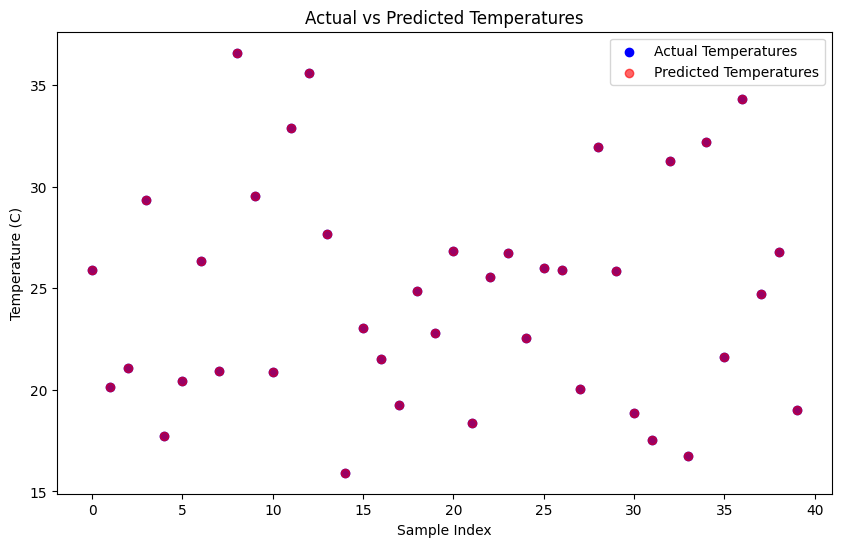

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Temperatures')
plt.scatter(range(len(predictions)), predictions, color='red', alpha=0.6, label='Predicted Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Temperature (C)')
plt.title('Actual vs Predicted Temperatures')
plt.legend()
plt.show()


In [37]:
cities = ["Cape Town", "Johannesburg", "Durban", "Pretoria", "Bloemfontein"]

all_data = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"
    response = requests.get(url)
    data = response.json()

    for entry in data['list']:
        weather_info = {
            'City': city,
            'Date': entry['dt_txt'],
            'Temperature (C)': entry['main']['temp'] - 273.15,  # Convert from Kelvin to Celsius
            'Humidity (%)': entry['main']['humidity'],
            'Wind Speed (m/s)': entry['wind']['speed'],
        }
        all_data.append(weather_info)

# Combine all data into a single DataFrame
multi_city_df = pd.DataFrame(all_data)

# Display the first few rows
print(multi_city_df.head(100))


         City                 Date  Temperature (C)  Humidity (%)  \
0   Cape Town  2024-12-10 18:00:00            24.63            69   
1   Cape Town  2024-12-10 21:00:00            23.12            75   
2   Cape Town  2024-12-11 00:00:00            21.26            83   
3   Cape Town  2024-12-11 03:00:00            19.37            91   
4   Cape Town  2024-12-11 06:00:00            21.02            80   
..        ...                  ...              ...           ...   
95     Durban  2024-12-12 15:00:00            25.90            86   
96     Durban  2024-12-12 18:00:00            23.82            90   
97     Durban  2024-12-12 21:00:00            22.95            91   
98     Durban  2024-12-13 00:00:00            22.72            91   
99     Durban  2024-12-13 03:00:00            22.81            90   

    Wind Speed (m/s)  
0               4.26  
1               3.62  
2               3.26  
3               3.09  
4               3.63  
..               ...  
95        

**Analyzing trends, averages, and correlations for weather patterns across cities.**

              Temperature (C)  Humidity (%)  Wind Speed (m/s)
City                                                         
Bloemfontein         25.82050        29.225           5.97700
Cape Town            19.17875        66.150           4.42650
Durban               23.51775        85.400           4.70900
Johannesburg         23.30625        45.600           4.08525
Pretoria             25.61275        47.850           3.84375


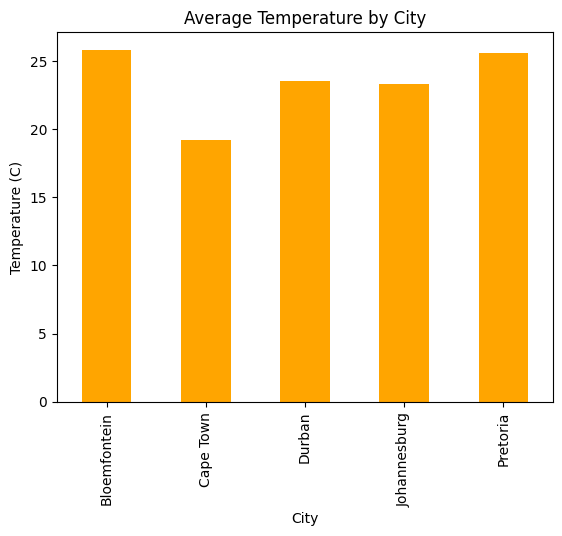

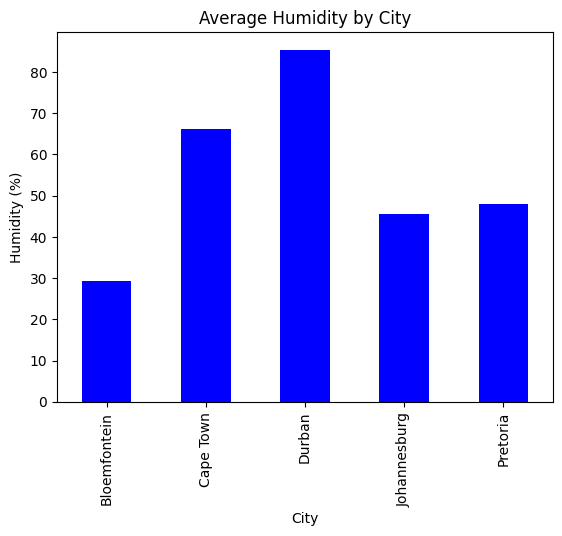

In [38]:
# Group data by city
city_stats = multi_city_df.groupby('City')[['Temperature (C)', 'Humidity (%)', 'Wind Speed (m/s)']].mean()
print(city_stats)

# Plotting
multi_city_df.groupby('City')['Temperature (C)'].mean().plot(kind='bar', color='orange', title='Average Temperature by City')
plt.ylabel('Temperature (C)')
plt.show()

multi_city_df.groupby('City')['Humidity (%)'].mean().plot(kind='bar', color='blue', title='Average Humidity by City')
plt.ylabel('Humidity (%)')
plt.show()


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Include the 'City' as a categorical feature
multi_city_df['City'] = multi_city_df['City'].astype('category').cat.codes  # Encode city names

X = multi_city_df[['Humidity (%)', 'Wind Speed (m/s)', 'City']]  # Features
y = multi_city_df['Temperature (C)']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")


Random Forest Mean Squared Error: 6.225622413249996


**Dashboard for Visualization**

In [41]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [42]:
import streamlit as st

st.title("Weather Prediction Dashboard")

# Select a city
selected_city = st.selectbox("Select a City", cities)

# Filter data for the selected city
city_data = multi_city_df[multi_city_df['City'] == selected_city]

# Plot temperature trends
st.line_chart(city_data.set_index('Date')['Temperature (C)'])

# Display summary stats
st.write(city_data.describe())


2024-12-10 17:14:14.104 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:14:14.266 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-10 17:14:14.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:14:14.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:14:14.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:14:14.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:14:14.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:14:14.296 Session state does not 

In [43]:
!pip install streamlit pyngrok

In [44]:
import streamlit as st

st.title("Weather Prediction Dashboard")

# Select a city
selected_city = st.selectbox("Select a City", cities)

# Filter data for the selected city
city_data = multi_city_df[multi_city_df['City'] == selected_city]

# Plot temperature trends
st.line_chart(city_data.set_index('Date')['Temperature (C)'])

# Display summary stats
st.write(city_data.describe())


2024-12-10 17:16:59.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:16:59.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:16:59.532 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:16:59.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:16:59.553 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:16:59.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:16:59.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-10 17:16:59.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar